#Reinforcement Learning
##Reinforcement Learning is a type of machine learning where an agent learns how to make decisions by interacting with an environment. The agent receives feedback in the form of rewards or penalties for its actions. It explores different actions to maximize the total reward it receives over time. Through trial and error, the agent learns a strategy, called a policy, that guides its actions to achieve long-term goals. Reinforcement Learning is used in various applications like autonomous robots, game playing, and recommendation systems. It mimics how humans and animals learn from their experiences to make better decisions in dynamic and uncertain environments.

##So we will train an agent to learn the “Frozen Lake” simulated environment using gym (https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

##Import all the neccessary libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Import the necessary Gym module for FrozenLake
import gym

#Define a 4x4 frozen lake environment, and render the environment

In [47]:
# Create the Frozen Lake environment
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()

0


# Getting familiarized with the environment-space and action-space using gym API commands:

In [48]:
# Get the action space and observation space
action_space = environment.action_space
observation_space = environment.observation_space

print("Action Space:", action_space)
print("Observation Space:", observation_space)


Action Space: Discrete(4)
Observation Space: Discrete(16)


We can see the action space and observation space of the Frozen Lake environment. It prints the number of possible actions (e.g., left, right, up, down) and the number of possible states or observations within the environment, providing a summary of the environment's configuration.

#Now we will be training the agent.

In [55]:
# Initialize Q-table with zeros
q_table = np.zeros([observation_space.n, action_space.n])
print("Q-Table before training:", q_table)

# Set hyperparameters
learning_rate = 0.8
discount_rate = 0.95
num_episodes = 1000
episode_rewards = []

# Training the agent
for episode in range(1, num_episodes + 1):
    state = environment.reset()
    done = False
    total_reward = 0


    while not done:
        # Choose action with epsilon-greedy policy
        action = np.argmax(q_table[state, :] + np.random.randn(1, action_space.n) * (1.0 / (episode + 1)))

        # Perform action, observe state and reward
        next_state, reward, done, _ = environment.step(action)

        # Update Q-table via Q-learning
        q_table[state, action] += learning_rate * (reward + discount_rate * np.max(q_table[next_state, :]) - q_table[state, action])

        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)

Q-Table before training: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#Printing the Q table after training

In [50]:
# Q-table after training
print("Q-Table after training:")
print(q_table)

Q-Table after training:
[[0.         0.77378094 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81450625 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.857375   0.        ]
 [0.         0.9025     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.95       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


The Q-table is updated based on observed rewards and states during training episodes. The agent learns to make decisions to maximize rewards. The episode_rewards list stores the total reward for each episode during training.

#Plotting the training history. Episode number vs outcome (failure/success)

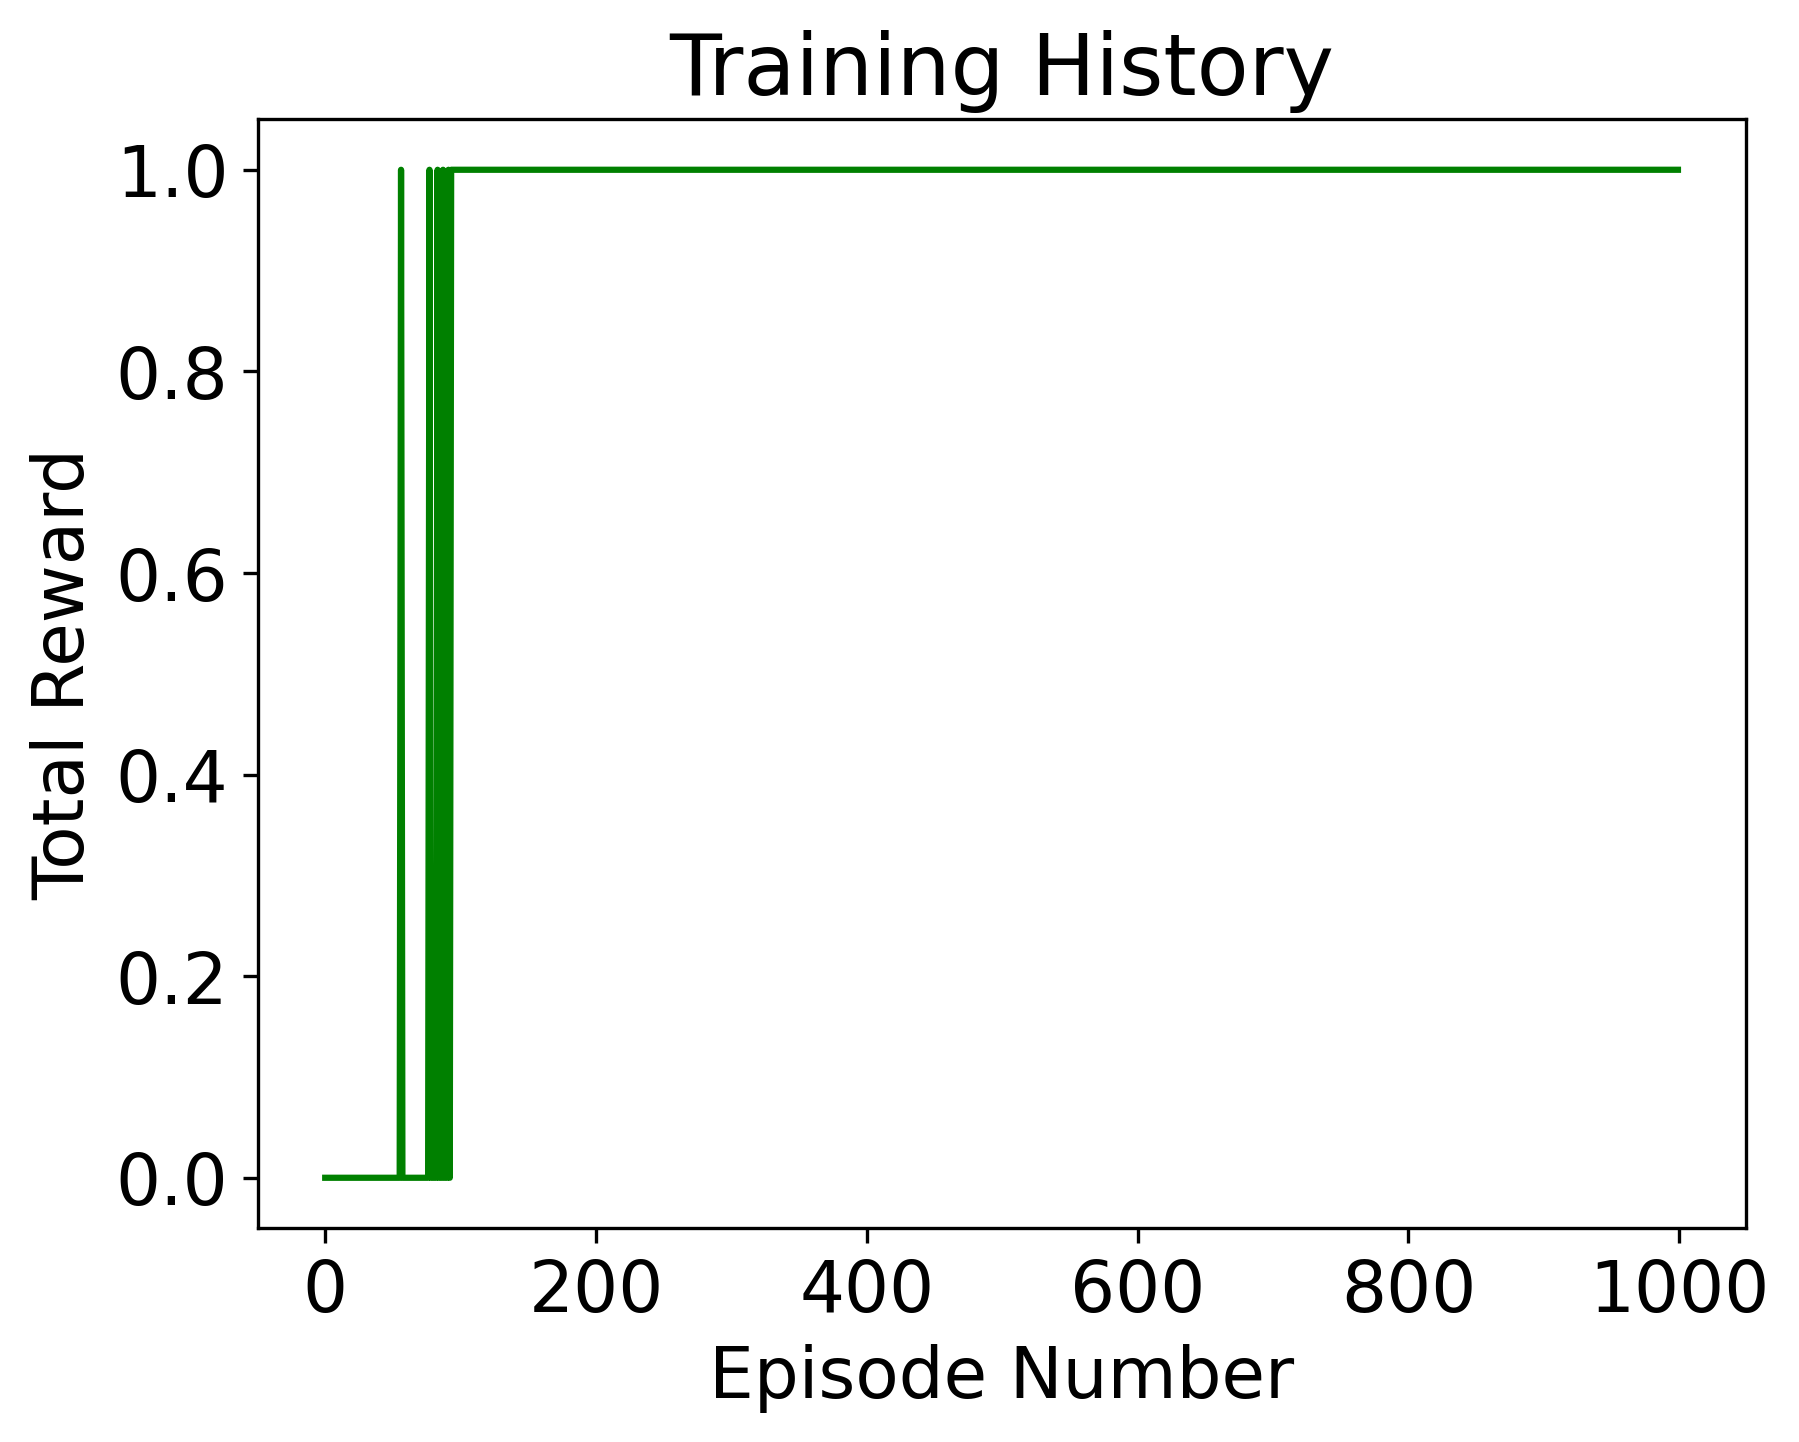

In [53]:
# Plot training history (episodic rewards)
plt.plot(episode_rewards, linestyle='-', color='g')
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.title('Training History')
plt.show()


The graph illustrates the agent's success rate in solving the task. Initially, the success rate steadily increases from 0% to 100% within the first 100 episodes, indicating rapid learning. Subsequently, it remains consistently high at 100% from episodes 100 to 1000, indicating the agent has mastered the task and consistently achieves success.

#Evaluate the performance of the trained agent, report success rate for 100 episodes.

In [52]:
count = 0
num_episodes = 100

for _ in range(num_episodes):
    state = environment.reset()
    done_val = False

    while not done_val:
        # Choose the best action based on the learned Q-values
        action = np.argmax(q_table[state, :])
        next_state, _, done_val, _ = environment.step(action)
        state = next_state

    # If the agent successfully reaches the goal
    if state == observation_space.n - 1:
        count += 1

success_rate = count / num_episodes
print("Success Rate:", success_rate)


Success Rate: 1.0


The code runs 100 episodes of the agent's interaction with the environment. In each episode, the agent starts from the initial state and selects actions based on the learned Q-values to reach the goal state. If the agent successfully reaches the goal in an episode, 'count' is incremented. The 'Success Rate' is the ratio of episodes where the agent reached the goal, and it is printed as 1, indicating a 100% success rate, meaning the agent consistently reaches the goal in all 100 episodes.